In [1]:
import os
import pickle

import cv2
from tqdm import tqdm
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
np.random.seed(1234)

In [2]:
TEST_PREDICTIONS_FILENAME = "../runs/denset169_test_predictions.pkl"
TEST_GROUD_TRUE = "../data/test/test_points.csv"
NUM_IMAGES_TO_SHOW = 16
NUM_COLS = 4
NUM_ROWS = NUM_IMAGES_TO_SHOW // NUM_COLS + int(NUM_IMAGES_TO_SHOW % NUM_COLS != 0)

In [3]:
def make_landmarks(row):
    landmark =  np.array(row.strip('][').split(', ')).astype(int)
    land_mark_len = landmark
    land_mark_len = landmark.shape[0]
    landmark = landmark.reshape(int(land_mark_len/2), 2)
    return landmark

In [4]:
df = pd.read_csv(TEST_GROUD_TRUE, sep='\t')
df.head(5)

,file_name,point_index_list
0,fca085b03b834d9d94170e8f1453276e.jpg,"[916, 842, 715, 351, 147, 808, 893, 785, 591, ..."
1,314153ca3f8999b9ef129b3bd0fdbd0b.jpg,"[933, 282, 556, 751, 296, 185, 800, 731, 142, ..."
2,f071f25018daeb373b4735830cc2ef9f.jpg,"[686, 419, 695, 247, 114, 935, 444, 308, 227, ..."
3,20da86fa93ef1877bc6693a180277134.jpg,"[633, 138, 512, 285, 918, 41, 297, 481, 217, 3..."
4,7f01740a38960addd76b090c02b72f50.jpg,"[771, 969, 319, 495, 425, 942, 63, 335, 921, 7..."


In [5]:
with open(TEST_PREDICTIONS_FILENAME, "rb") as fp:
    results = pickle.load(fp)
image_names = results["image_names"]
landmarks = results["landmarks"]

ground_true = []
for i in tqdm(range(len(df))):
    ground_true.append(make_landmarks(df.iloc[i]['point_index_list']))
    
print("Images:", len(image_names))
print("Landmarks shape:", landmarks.shape)
print("GroudTrue shape:", landmarks.shape)

if len(image_names) < NUM_IMAGES_TO_SHOW:
    raise RuntimeError(f"Choose less images to show, you have only {len(image_names)}")

100%|██████████| 16000/16000 [00:01<00:00, 9300.66it/s]

Images: 16000
Landmarks shape: (16000, 971, 2)
GroudTrue shape: (16000, 971, 2)


In [6]:
def draw_landmarks(image, landmarks, ground_true):
    for point in ground_true:
        x, y = point.astype(int)
        cv2.circle(image, (x, y), 1, (0, 128, 0), 1, -1)
    for point in landmarks:
        x, y = point.astype(int)
        cv2.circle(image, (x, y), 1, (128, 0, 0), 1, -1)
    return image

In [13]:
ground_true[0]

array([[916, 842],
       [715, 351],
       [147, 808],
       [893, 785],
       [591, 553],
       [614, 388],
       [261,  91],
       [341, 430],
       [294, 463],
       [319, 496],
       [933,  70],
       [358, 740],
       [411, 954],
       [291, 111],
       [ 65, 597]])

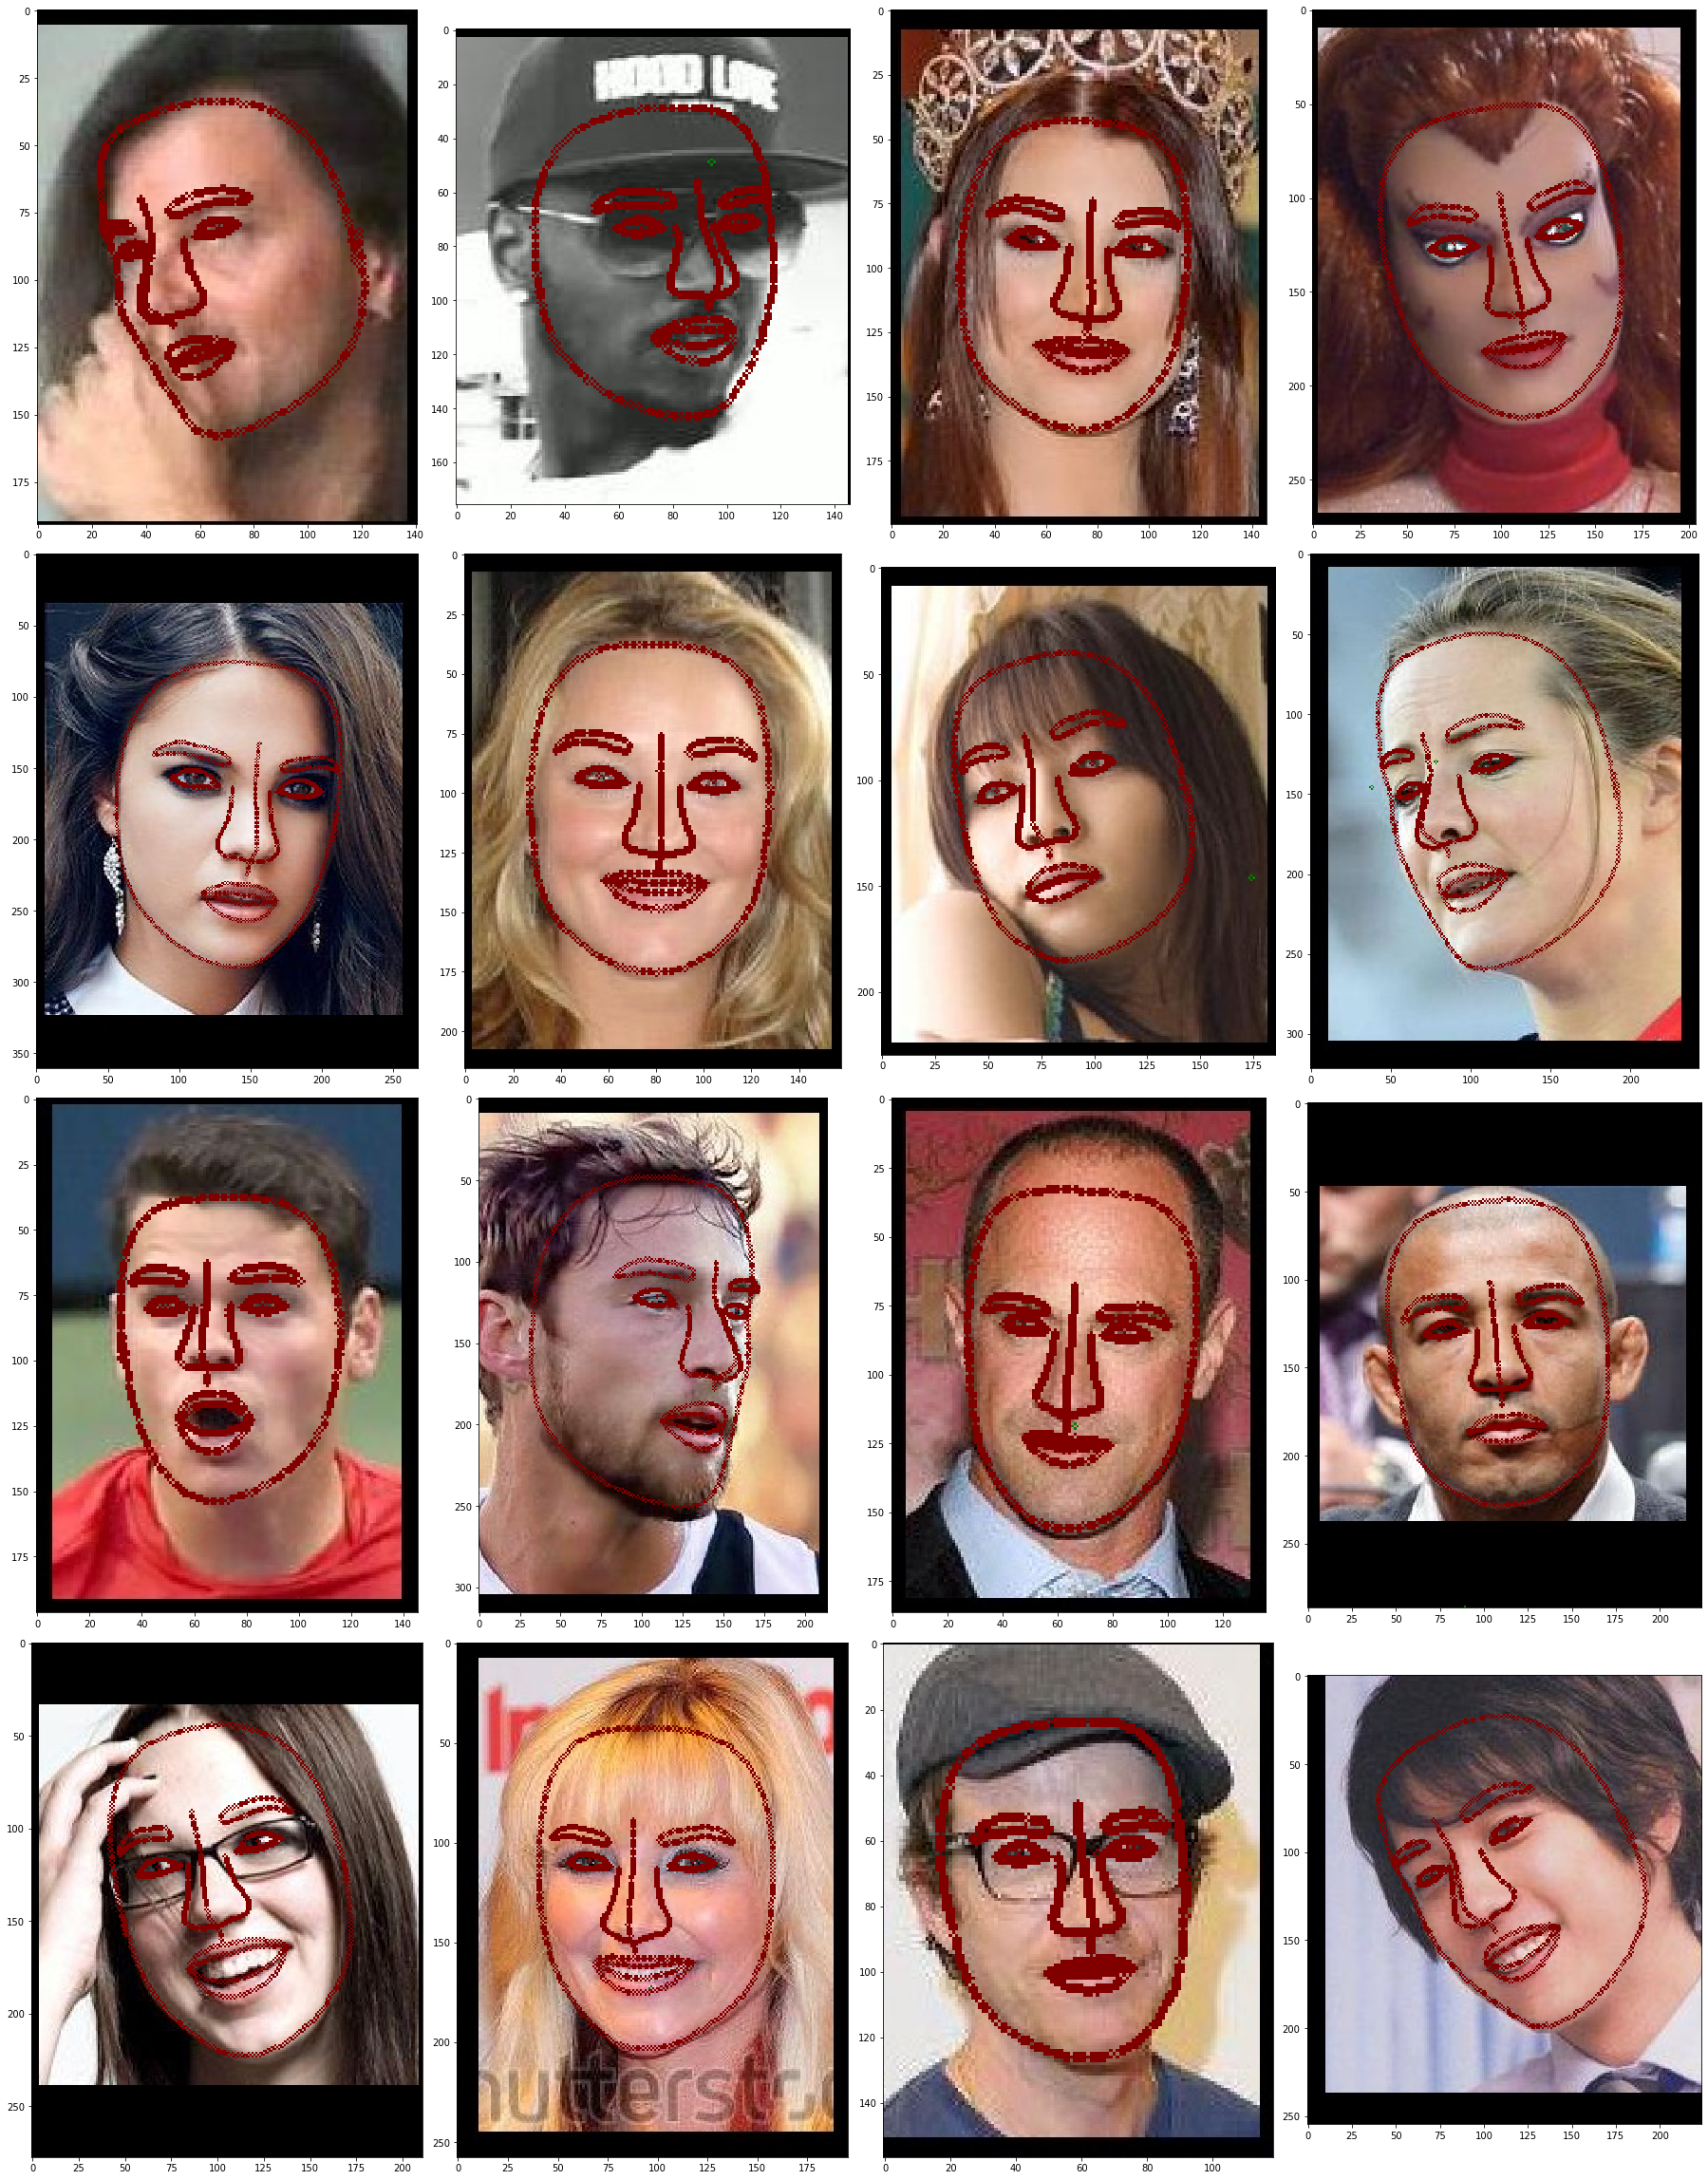

In [7]:
random_idxs = np.random.choice(len(image_names), size=min(NUM_IMAGES_TO_SHOW, len(image_names)), replace=False)

plt.figure(figsize=(25, NUM_ROWS * 8))
for i, idx in enumerate(random_idxs, 1):
    image = cv2.imread('../' + image_names[idx])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = draw_landmarks(image, landmarks[idx], ground_true[idx])
    
    plt.subplot(NUM_ROWS, NUM_COLS, i)
    plt.imshow(image)

plt.tight_layout()
plt.show()